In [2]:
### COMPUTER VISION ###
# REQUIREMENTS
%pip install opencv-python
%pip install opencv-contrib-python
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
### IMAGE PROCESSING ###
import cv2 as cv

img = cv.imread('Resources/Photos/cat.jpg')
print('Image Shape :', img.shape)

Image Shape : (427, 640, 3)


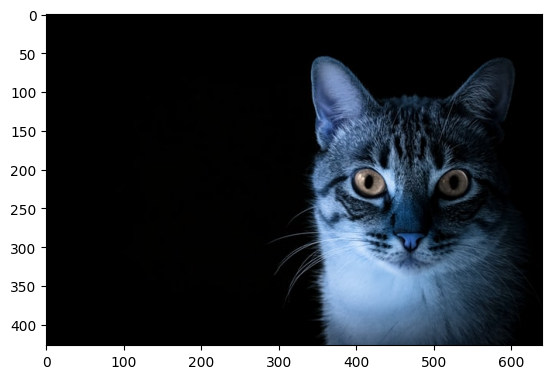

In [4]:
import matplotlib.pyplot as plt

plt.imshow(img)

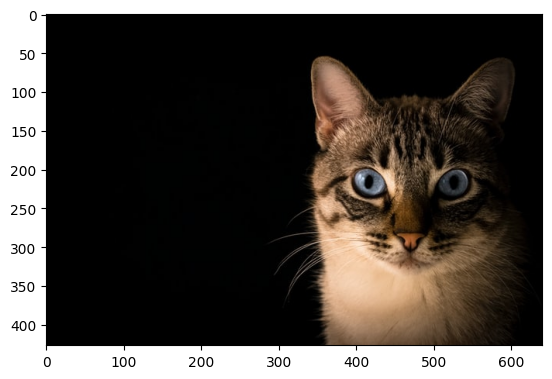

In [5]:
### CONVERTING COLORSPACES ###

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

GrayScale Image Shape : (427, 640)


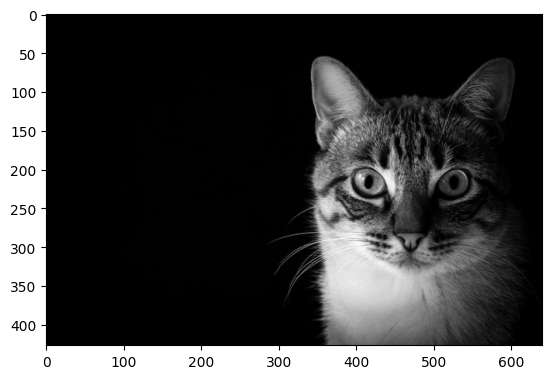

In [7]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
print('GrayScale Image Shape :', img_gray.shape)

In [8]:
import os

os.makedirs('Output', exist_ok=True)
cv.imwrite('Output/cat_gray.jpg', img_gray)

True

FPS : 29.97002997002997
SHAPE : 1280.0 720.0


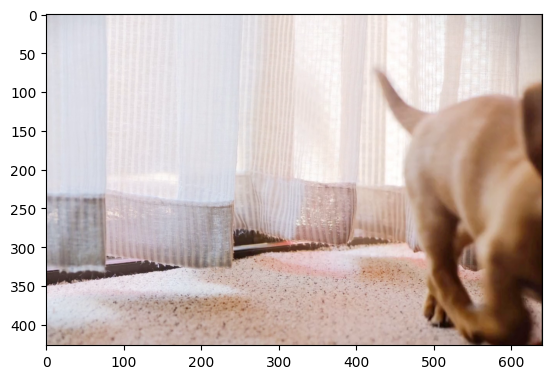

In [20]:
%matplotlib inline
vcap = cv.VideoCapture('Resources/Videos/dog.mp4')
fig = plt.figure()
ax = fig.gca()
ax_im = ax.imshow(img_rgb)
plt.ion()
while True:
    ret, frame = vcap.read()
    if ret:
        frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        ax_im.set_data(frame)
    else:
        break
print('FPS :', vcap.get(cv.CAP_PROP_FPS))
print('SHAPE :', vcap.get(cv.CAP_PROP_FRAME_WIDTH), vcap.get(cv.CAP_PROP_FRAME_HEIGHT))
vcap.release()

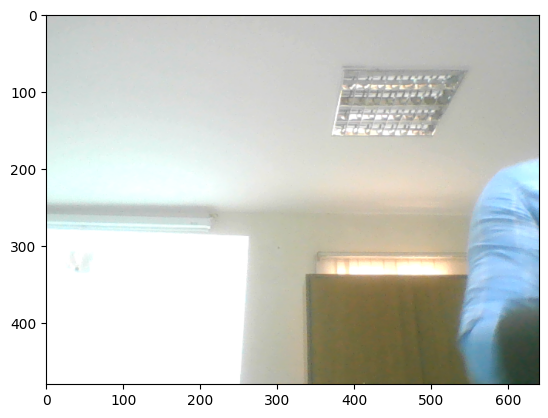

In [24]:
### CAPTURING VIDEO FROM WEBCAM ###
vcap = cv.VideoCapture(0)
ret, frame = vcap.read()
plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
vcap.release()

In [25]:
### WRITING VIDEOS ###
vcap = cv.VideoCapture(0)
FPS = 24
SECONDS = 5
SIZE = (640, 480)
out = cv.VideoWriter(
    'Output/capture.avi', 
    cv.VideoWriter_fourcc('X', 'V', 'I', 'D'),
    FPS, SIZE
)
for f in range(0, FPS * SECONDS):
    print('[INFO] Capturing Frame :: {0}'.format(f))
    ret, frame = vcap.read()
    if ret:
        out.write(frame)
vcap.release()
out.release()

[INFO] Capturing Frame :: 0
[INFO] Capturing Frame :: 1
[INFO] Capturing Frame :: 2
[INFO] Capturing Frame :: 3
[INFO] Capturing Frame :: 4
[INFO] Capturing Frame :: 5
[INFO] Capturing Frame :: 6
[INFO] Capturing Frame :: 7
[INFO] Capturing Frame :: 8
[INFO] Capturing Frame :: 9
[INFO] Capturing Frame :: 10
[INFO] Capturing Frame :: 11
[INFO] Capturing Frame :: 12
[INFO] Capturing Frame :: 13
[INFO] Capturing Frame :: 14
[INFO] Capturing Frame :: 15
[INFO] Capturing Frame :: 16
[INFO] Capturing Frame :: 17
[INFO] Capturing Frame :: 18
[INFO] Capturing Frame :: 19
[INFO] Capturing Frame :: 20
[INFO] Capturing Frame :: 21
[INFO] Capturing Frame :: 22
[INFO] Capturing Frame :: 23
[INFO] Capturing Frame :: 24
[INFO] Capturing Frame :: 25
[INFO] Capturing Frame :: 26
[INFO] Capturing Frame :: 27
[INFO] Capturing Frame :: 28
[INFO] Capturing Frame :: 29
[INFO] Capturing Frame :: 30
[INFO] Capturing Frame :: 31
[INFO] Capturing Frame :: 32
[INFO] Capturing Frame :: 33
[INFO] Capturing Frame :

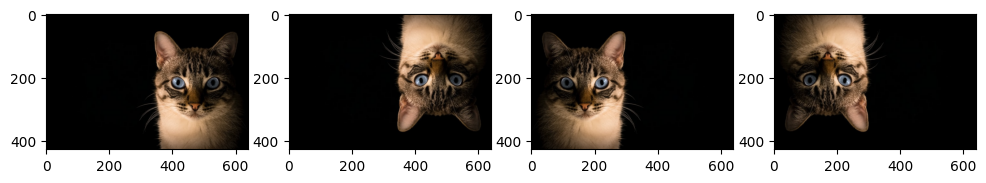

In [37]:
### IMAGE MANIPULATION ###
# FLIP
img = cv.imread('Resources/Photos/cat.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 12))
axes[0].imshow(img)
axes[1].imshow(cv.flip(img, 0))
axes[2].imshow(cv.flip(img, 1))
axes[3].imshow(cv.flip(img, -1))

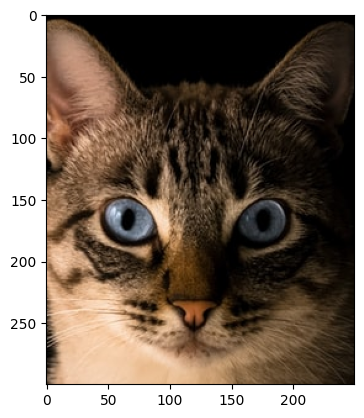

In [47]:
# CROP
plt.imshow(img[50:350, 350:600])

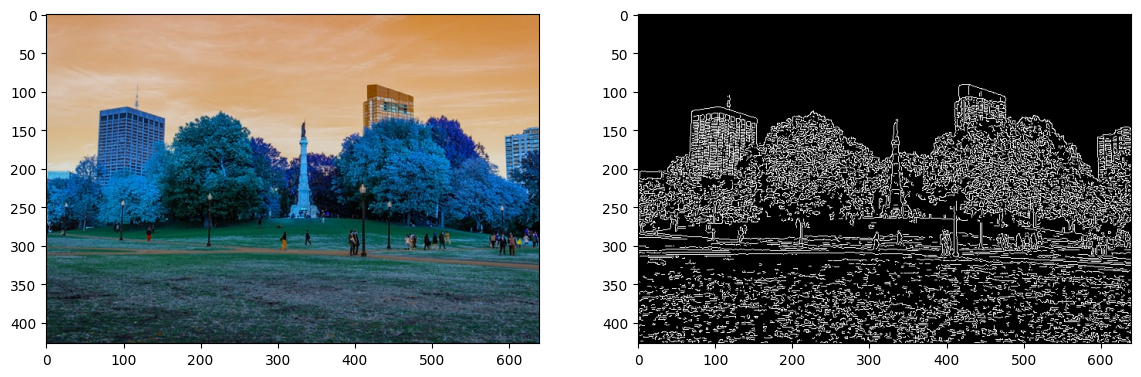

In [58]:
# Edge Detection
img = cv.imread('Resources/Photos/park.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
canny_edges = cv.Canny(img, 125, 175)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 14))
axes[0].imshow(img)
axes[1].imshow(canny_edges, cmap='gray')

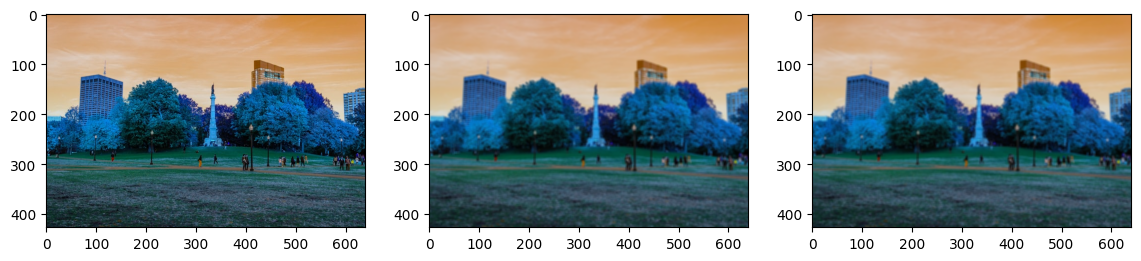

In [63]:
# Smoothning
img = cv.imread('Resources/Photos/park.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
blurred = cv.blur(img, (5, 5))
g_blurred = cv.GaussianBlur(img, (5, 5), 10)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 14))
axes[0].imshow(img)
axes[1].imshow(blurred)
axes[2].imshow(g_blurred)

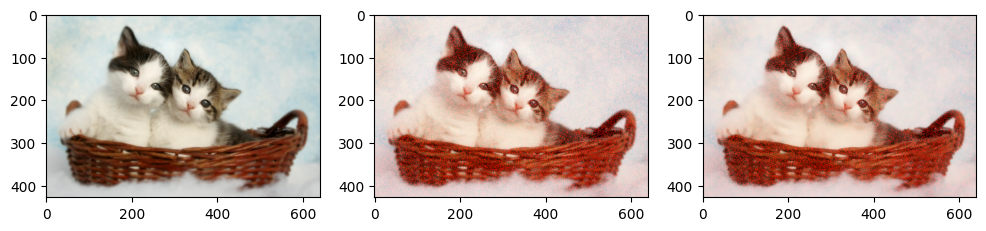

In [75]:
# Noise Filtering
import numpy as np
img = cv.imread('Resources/Photos/cats 2.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
noise = np.zeros(img.shape, np.uint8)
cv.randn(noise, 0, 180)
noisy_img = cv.add(img, noise)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 12))
axes[0].imshow(img)
axes[1].imshow(noisy_img)
noise_removed = cv.bilateralFilter(noisy_img, 10, 35, 25)
axes[2].imshow(noise_removed)

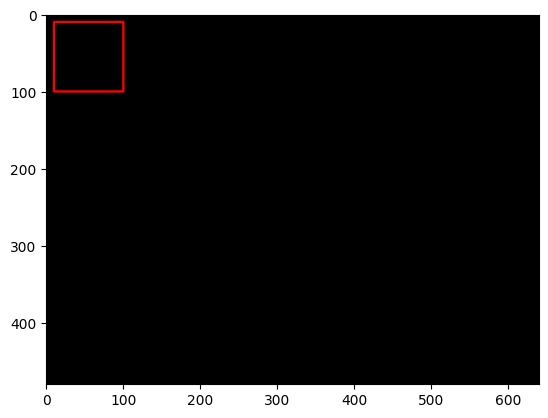

In [86]:
blank = np.zeros((480, 640), np.uint8)
blank = cv.cvtColor(blank, cv.COLOR_BGR2RGB)
cv.rectangle(blank, (10, 10), (100, 100), (255, 0, 0), 2)
plt.imshow(blank)

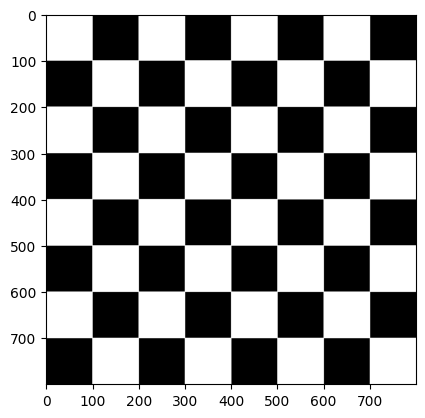

In [93]:
NCOLS = 8
NROWS = 8
COLOR = (255, 255, 255)
SQ_SIZE = 100
blank = np.zeros((SQ_SIZE * NROWS, SQ_SIZE * NCOLS), np.uint8)
blank = cv.cvtColor(blank, cv.COLOR_BGR2RGB)
for r in range(NROWS):
    IS_WHITE = (r % 2) == 0
    for c in range(NCOLS):
        if IS_WHITE:
            sp = (SQ_SIZE * r, SQ_SIZE * c)
            ep = (SQ_SIZE * (r+1), SQ_SIZE * (c+1))
            cv.rectangle(blank, sp, ep, COLOR, -1)
            IS_WHITE = False
        else:
            IS_WHITE = True
plt.imshow(blank)

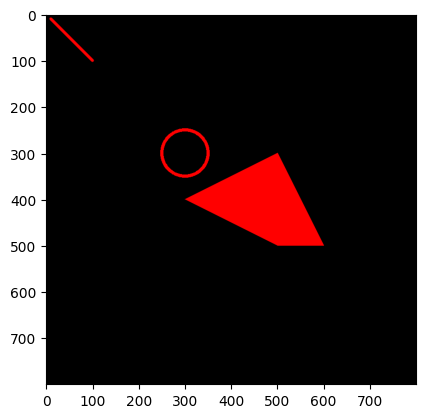

In [116]:
blank = np.zeros((SQ_SIZE * NROWS, SQ_SIZE * NCOLS), np.uint8)
blank = cv.cvtColor(blank, cv.COLOR_BGR2RGB)

cv.line(blank, (10, 10), (100, 100), (255, 0, 0), 5)
cv.circle(blank, (300, 300), 50, (255, 0, 0), 5)
pts = np.array([[500, 300], [300, 400], [500, 500], [600, 500]], dtype=np.int32)
cv.fillPoly(blank, [pts], (255, 0, 0))

plt.imshow(blank)

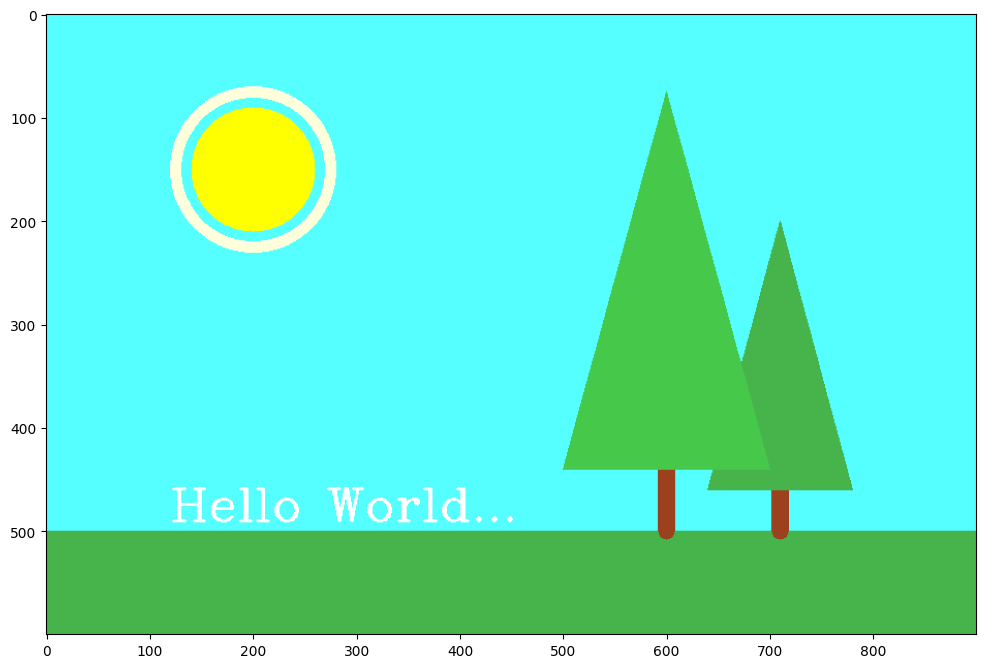

In [128]:
H, W = 600, 900
img = np.zeros((H, W, 3), dtype=np.uint8)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

cv.rectangle(img, (0, 0), (900, 500), (85, 255, 255), -1)
cv.rectangle(img, (0, 500), (900, 600), (70, 180, 75), -1)

cv.circle(img, (200, 150), 60, (255, 255, 0), -1)
cv.circle(img, (200, 150), 75, (255, 255, 220), 10)

cv.line(img, (710, 500), (710, 420), (155, 65, 30), 15)
pts = np.array([[640, 460], [780, 460], [710, 200]], dtype=np.int32)
cv.fillPoly(img, [pts], (70, 180, 75))

cv.line(img, (600, 500), (600, 420), (155, 65, 30), 15)
pts = np.array([[500, 440], [700, 440], [600, 75]], dtype=np.int32)
cv.fillPoly(img, [pts], (70, 200, 75))

cv.putText(img, 'Hello World...', (120, 490), 
           cv.FONT_HERSHEY_COMPLEX, 1.5, (255, 255, 255), 2)

plt.figure(figsize=(12, 12))
plt.imshow(img)

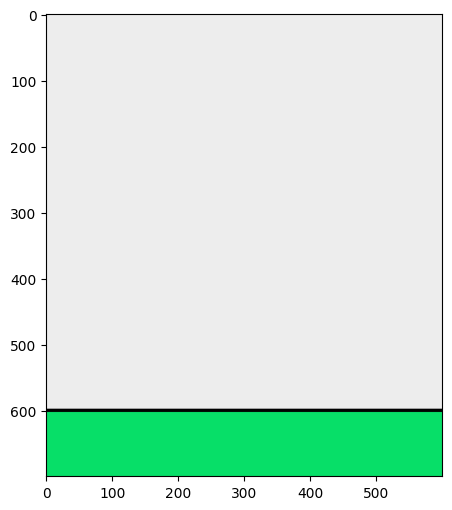

In [137]:
img = np.zeros((700, 600), np.uint8)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

cv.rectangle(img, (0, 0), (600, 700), (237, 237, 237), -1)
cv.rectangle(img, (0, 600), (600, 700), (7, 223, 104), -1)

cv.line(img, (0, 600), (600, 600), (0, 0, 0), 3)

pts = np.array([[400, 600], [300, 700]], dtype=np.int8)
cv.fillPoly(img, pts, )

plt.figure(figsize=(8, 6))
plt.imshow(img)